# MTech Automotive Engineering - KPIM01CEM - Dissertation Automotive Electronics - 1920AAA

##  Authentication, Alert & Safety System for Intelligent Vehicles using Face Detection, Recognition and IOT

### Author: Samiran Patra


## 1 Data Pre-Processing

Required Library Files

In [70]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import numpy as np
import pandas as pd
import csv
import cv2
import numpy as np
import argparse
import imutils
import time
import dlib
import json
import requests
import matplotlib.pyplot as plt

from cv2 import CascadeClassifier
from cv2 import imread
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils


Function to load images and extract faces for all images in a directory

In [45]:
def load_faces(directory):
    global flag
    faces = list()
    for filename in listdir(directory):
        path = directory + '/' + filename
        face = extract_face(path)
        if flag != 1:
            faces.append(face)
    return faces

Function to load a dataset that contains one subdir for each class that in turn contains images

In [46]:
def load_dataset(directory):
    X, y = list(), list()
    df = pd.read_csv("Dataset.csv",sep=';')
    df = df.values
    df = df.ravel()
    count = 0
    for subdir in listdir(directory):
        path = directory + '/' + subdir + '/'
        faces = load_faces(path)
        labels = [df[count] for _ in range(len(faces))]
        print('>loaded %d examples for class: %s' % (len(faces), df[count]))
        X.extend(faces)
        y.extend(labels)
        count+=1
    return asarray(X), asarray(y)

# 2 Face Detection

## 2.1 Cascade Classifier
Function to Detect and Extract face ROI using the Cascasde Classifier model

In [85]:
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
flag = 0

In [86]:
def extract_face(filename, required_size=(160, 160)):
    global flag
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    results = classifier.detectMultiScale(pixels)
    if results==():
        flag = 1
        return 0
    else:
        flag = 0
    x1 = results[0][0]
    y1 = results[0][1]
    width = results[0][2]
    height = results[0][3]
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

Load Dataset and detect faces

In [106]:
Xtrain, Ytrain = load_dataset('C:/Users/qv445/Desktop/Disseration/cfp-dataset/Data/Images')
print(Xtrain.shape, Ytrain.shape)
accuracy = (len(Ytrain)/5000)*100
print('Accuracy: %.3f' %accuracy)

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


>loaded 8 examples for class: 50 Cent
>loaded 4 examples for class: Aaron Hernandez
>loaded 2 examples for class: Aaron Rodgers
>loaded 1 examples for class: Abhishek Bachchan
>loaded 10 examples for class: Adam Levine
>loaded 10 examples for class: Adam Sandler
>loaded 1 examples for class: Adrian Gonzalez
>loaded 0 examples for class: Adrian Peterson
>loaded 10 examples for class: Aishwarya Rai
>loaded 2 examples for class: Ajay Devgan
>loaded 4 examples for class: Akshay Kumar
>loaded 2 examples for class: Al Pacino
>loaded 4 examples for class: Albert Pujol
>loaded 9 examples for class: Alex Fergusson
>loaded 10 examples for class: Alex Morgan
>loaded 9 examples for class: Alex Rodriguez
>loaded 1 examples for class: Alexis Sanchez
>loaded 10 examples for class: Alicia Keys
>loaded 2 examples for class: Allen Iverson
>loaded 6 examples for class: Allyson Felix
>loaded 1 examples for class: Alvaro Uribe
>loaded 5 examples for class: Alyson Hannigan
>loaded 10 examples for class: Aly

>loaded 10 examples for class: Oscar Pistorius
>loaded 4 examples for class: Paolo Maldini
>loaded 10 examples for class: Paris Hilton
>loaded 0 examples for class: Patrick Dempsey
>loaded 10 examples for class: Pau Gasol
>loaded 1 examples for class: Paul Pogba
>loaded 1 examples for class: Paul Ryan
>loaded 0 examples for class: Paul Scholes
>loaded 3 examples for class: Paul Walker
>loaded 8 examples for class: Pele
>loaded 10 examples for class: Penelope Cruz
>loaded 1 examples for class: Peter Dinklage
>loaded 10 examples for class: Petra Kvitova
>loaded 10 examples for class: Peyton Manning
>loaded 2 examples for class: Phil Mickelson
>loaded 0 examples for class: Philipp Lahm
>loaded 1 examples for class: Piedad Cordoba
>loaded 7 examples for class: Princess Diana
>loaded 10 examples for class: Priyanka Chopra
>loaded 10 examples for class: Queen Elizabeth Ii
>loaded 1 examples for class: Radamel Falcao
>loaded 9 examples for class: Rafael Nadal
>loaded 4 examples for class: Rah

## 2.1 Multi Task Cascasded Convolutional Neural Network
Function to Detect and Extract face ROI using the MTCNN model

In [17]:
classifier = MTCNN()
flag = 0

In [18]:
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    results = classifier.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [19]:
Xtrain, Ytrain = load_dataset('C:/Users/qv445/Desktop/Disseration/cfp-dataset/Data/Images')
print(Xtrain.shape, Ytrain.shape)
accuracy = (len(Ytrain)/5000)*100
print('Accuracy: %.3f' %accuracy)

>loaded 10 examples for class: 50 Cent
>loaded 10 examples for class: Aaron Hernandez
>loaded 10 examples for class: Aaron Rodgers
>loaded 10 examples for class: Abhishek Bachchan
>loaded 10 examples for class: Adam Levine
>loaded 10 examples for class: Adam Sandler
>loaded 10 examples for class: Adrian Gonzalez
>loaded 10 examples for class: Adrian Peterson
>loaded 10 examples for class: Aishwarya Rai
>loaded 10 examples for class: Ajay Devgan
>loaded 10 examples for class: Akshay Kumar
>loaded 10 examples for class: Al Pacino
>loaded 10 examples for class: Albert Pujol
>loaded 10 examples for class: Alex Fergusson
>loaded 10 examples for class: Alex Morgan
>loaded 10 examples for class: Alex Rodriguez
>loaded 10 examples for class: Alexis Sanchez
>loaded 10 examples for class: Alicia Keys
>loaded 10 examples for class: Allen Iverson
>loaded 10 examples for class: Allyson Felix
>loaded 10 examples for class: Alvaro Uribe
>loaded 10 examples for class: Alyson Hannigan
>loaded 10 exampl

>loaded 10 examples for class: Heath Ledger
>loaded 10 examples for class: Heidi Klum
>loaded 10 examples for class: Helen Mirren
>loaded 10 examples for class: Henrik Stenson
>loaded 10 examples for class: Henrique Capriles
>loaded 10 examples for class: Hillary Clinton
>loaded 10 examples for class: Hillary Swank
>loaded 10 examples for class: Hina Rabbani Khar
>loaded 10 examples for class: Hope Solo
>loaded 10 examples for class: Hrithik Roshan
>loaded 10 examples for class: Hugh Jackman
>loaded 10 examples for class: Hugh Laurie
>loaded 10 examples for class: Hugo Chavez
>loaded 10 examples for class: Igor Ivanov
>loaded 10 examples for class: Iker Casillas
>loaded 10 examples for class: Imran Khan
>loaded 10 examples for class: Ingrid Bergman
>loaded 10 examples for class: Jack Gleeson
>loaded 10 examples for class: Jackie Chan
>loaded 10 examples for class: Jackie Joyner Kersee
>loaded 10 examples for class: Jacques Chirac
>loaded 10 examples for class: James Mcavoy
>loaded 10 e

>loaded 10 examples for class: Nicole Kidman
>loaded 10 examples for class: Nicole Richie
>loaded 10 examples for class: Nikki Haley
>loaded 10 examples for class: Novak Djokovic
>loaded 10 examples for class: Orlando Bloom
>loaded 10 examples for class: Oscar Pistorius
>loaded 10 examples for class: Paolo Maldini
>loaded 10 examples for class: Paris Hilton
>loaded 10 examples for class: Patrick Dempsey
>loaded 10 examples for class: Pau Gasol
>loaded 10 examples for class: Paul Pogba
>loaded 10 examples for class: Paul Ryan
>loaded 10 examples for class: Paul Scholes
>loaded 10 examples for class: Paul Walker
>loaded 10 examples for class: Pele
>loaded 10 examples for class: Penelope Cruz
>loaded 10 examples for class: Peter Dinklage
>loaded 10 examples for class: Petra Kvitova
>loaded 10 examples for class: Peyton Manning
>loaded 10 examples for class: Phil Mickelson
>loaded 10 examples for class: Philipp Lahm
>loaded 10 examples for class: Piedad Cordoba
>loaded 10 examples for clas

# 3 Feature Extraction
## FaceNet Model

Funtion to get the face embedding for one face

In [64]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

Get Facial Embeddings for all Test and Train dataset

In [65]:
model = load_model('facenet_keras.h5')
newTrainX = list()
for face_pixels in Xtrain:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
savez_compressed('FDS_Dataset_Face-Embeddings.npz', newTrainX, Ytrain)

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(5000, 128)


## 4 Classification
Some preprocessing of data

In [66]:
data = load('FDS_Dataset_Face-Embeddings.npz')
trainX, trainy = data['arr_0'], data['arr_1']
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)

### 4.1 Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [24]:
model.fit(trainX, trainy)
print('Accuracy: %.3f' % (cross_val_score(model, trainX, trainy, cv=3).mean()*100))

Accuracy: 53.389


### 4.2 Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
model.fit(trainX, trainy)
print('Accuracy: %.3f' % (cross_val_score(model, trainX, trainy, cv=3).mean()*100))

Accuracy: 93.033


### 4.3 K-Nearest Neighbour Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [28]:
model.fit(trainX, trainy)
print('Accuracy: %.3f' % (cross_val_score(model, trainX, trainy, cv=3).mean()*100))

Accuracy: 96.350


### 4.4 SVM Classifier

In [29]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)

In [30]:
model.fit(trainX, trainy)
print('Accuracy: %.3f' % (cross_val_score(model, trainX, trainy, cv=3).mean()*100))

Accuracy: 97.711


### Tuning Hyperparameters for the SVM model using Gridsearch:

In [35]:
param_grid = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
              {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['poly'], 'degree': [1,2,3,4,5]}]
grid = GridSearchCV(SVC(), param_grid, verbose = 3, cv=3, refit = True, return_train_score=True, n_jobs=-1) 
grid.fit(trainX,trainy) 
print(grid.best_params_) 

Fitting 3 folds for each of 155 candidates, totalling 465 fits


C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 465 out of 465 | elapsed: 70.6min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Tuned SVM Model

In [67]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma=0.1, probability=True)

In [68]:
model.fit(trainX, trainy)
print('Accuracy: %.3f' % (cross_val_score(model, trainX, trainy, cv=3).mean()*100))

Accuracy: 97.878


## 5 Liveness and Drowsiness Detection


In [7]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

liveliness_detector = dlib.get_frontal_face_detector()
liveliness_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 5
COUNTER = 0
BLINKS = 0

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

vs = VideoStream(src=0).start()
fileStream = False
time.sleep(1.0)

while True:
    if fileStream and not vs.more():
        break

    frame = vs.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = liveliness_detector(gray, 0)

    for rect in rects:
        shape = liveliness_predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        for (a, b) in shape:
            cv2.circle(frame, (a, b), 1, (0, 0, 255), -1)

        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        if ear < EYE_AR_THRESH:
            COUNTER += 1
        else:
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                BLINKS +=1
            COUNTER = 0

        cv2.putText(frame, "Blinks: {}".format(BLINKS), (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "Eye_Ratio: {:.2f}".format(ear), (290, 15),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        if(COUNTER == 0):
            cv2.putText(frame, "Eyes Open", (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        else:
            cv2.putText(frame, "Eyes Closed", (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break
        
cv2.destroyAllWindows()
vs.stop()  

## 6 Push Notifications
Function to send Push Notification using Pushbullet API

In [37]:
def Send_Push_Message(message):
    token = "o.XHW6XRqfYs1ngEqNPq5HABuUAFkxDZud"
    headers = {"content-type": "application/json", "Authorization": 'Bearer '+token}
    url = 'https://api.pushbullet.com/v2/pushes'
    data_send = {"type": "note", "title": "FDAS Update:-", "body": message}
    push = requests.post(url, headers=headers, data=json.dumps(data_send), verify=False)

Sending Message

In [43]:
Send_Push_Message("This is a Test Message")

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## 7 Model Evaluation
### Plotting Validation Curves for Gamma

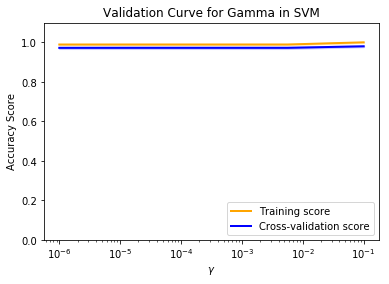

In [72]:
para_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    model, trainX, trainy, param_name="gamma", param_range=para_range ,
    scoring="accuracy", n_jobs=1, cv=5)
train_scores_m = np.mean(train_scores, axis=1)
train_scores_sd = np.std(train_scores, axis=1)
test_scores_m = np.mean(test_scores, axis=1)
test_scores_sd = np.std(test_scores, axis=1)

plt.title("Validation Curve for Gamma in SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(para_range, train_scores_m, label="Training score",
             color="orange", lw=lw)
plt.fill_between(para_range, train_scores_m - train_scores_sd,
                 train_scores_m + train_scores_sd, alpha=0.2,
                 color="orange", lw=lw)
plt.semilogx(para_range, test_scores_m, label="Cross-validation score",
             color="blue", lw=lw)
plt.fill_between(para_range, test_scores_m - test_scores_sd,
                 test_scores_m + test_scores_sd, alpha=0.2,
                 color="blue", lw=lw)
plt.legend(loc="lower right")
plt.show()

### Plotting Validation Curves for C

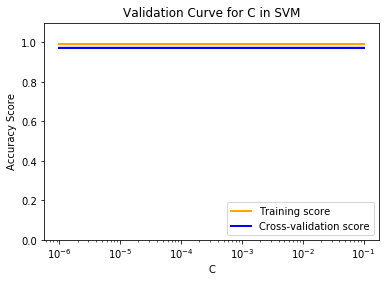

In [73]:
parameter_range = [0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(
    model, trainX, trainy, param_name="C", param_range=para_range ,
    scoring="accuracy", n_jobs=1, cv=5)
train_scores_m = np.mean(train_scores, axis=1)
train_scores_sd = np.std(train_scores, axis=1)
test_scores_m = np.mean(test_scores, axis=1)
test_scores_sd = np.std(test_scores, axis=1)

plt.title("Validation Curve for C in SVM")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(para_range, train_scores_m, label="Training score",
             color="orange", lw=lw)
plt.fill_between(para_range, train_scores_m - train_scores_sd,
                 train_scores_m + train_scores_sd, alpha=0.2,
                 color="orange", lw=lw)
plt.semilogx(para_range, test_scores_m, label="Cross-validation score",
             color="blue", lw=lw)
plt.fill_between(para_range, test_scores_m - test_scores_sd,
                 test_scores_m + test_scores_sd, alpha=0.2,
                 color="blue", lw=lw)
plt.legend(loc="lower right")
plt.show()

### Plotting Learning Curve

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


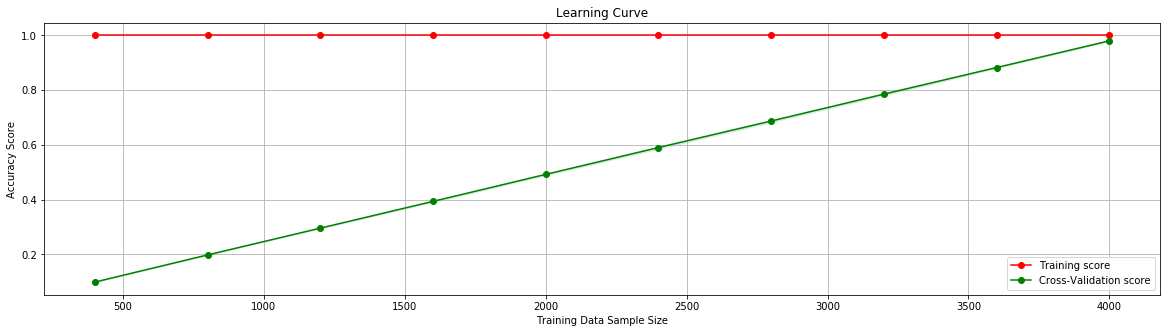

In [74]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.subplots(1, 1, figsize=(20, 5))

plt.title("Learning Curve")
plt.xlabel("Training Data Sample Size")
plt.ylabel("Accuracy Score")

training_sizes, training_scores, testing_scores = learning_curve(model, trainX, 
                                        trainy, cv=5, n_jobs=-1, train_sizes=training_sizes)

training_scores_m = np.mean(training_scores, axis=1)
training_scores_sd = np.std(training_scores, axis=1)
testing_scores_m = np.mean(testing_scores, axis=1)
testing_scores_sd = np.std(testing_scores, axis=1)

plt.grid()
plt.fill_between(training_sizes, training_scores_m - training_scores_sd,
                     training_scores_m + training_scores_sd, alpha=0.1,
                     color="r")
plt.fill_between(training_sizes, testing_scores_m - testing_scores_sd,
                     testing_scores_m + testing_scores_sd, alpha=0.1,
                     color="g")
plt.plot(training_sizes, training_scores_m, 'o-', color="r",
             label="Training score")
plt.plot(training_sizes, testing_scores_m, 'o-', color="g",
             label="Cross-Validation score")
plt.legend(loc="lower right")

plt.show()

### Splitting the dataset for Holdout Accuracy

In [75]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(Xtrain, Ytrain, random_state=1)
print(trainX.shape, testX.shape)

(3750, 160, 160, 3) (1250, 160, 160, 3)


### Feature Extraction

In [76]:
model = load_model('facenet_keras.h5')
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
savez_compressed('FDS_Dataset_Face-Embeddings.npz', newTrainX, trainy, newTestX, testy)

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(3750, 128)
(1250, 128)


In [77]:
data = load('FDS_Dataset_Face-Embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

Dataset: train=3750, test=1250


### SVM Clasification

In [78]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
model.fit(trainX, trainy)
yhat_test = model.predict(testX)
score_test = accuracy_score(testy, yhat_test)
print('Accuracy: test=%.3f' % (score_test*100))

Accuracy: test=97.120


### Classification Report

In [79]:
print (classification_report(testy, yhat_test)) 

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.83      1.00      0.91         5
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         4
          6       1.00      1.00      1.00         1
          7       0.50      1.00      0.67         1
          8       1.00      1.00      1.00         2
          9       0.80      1.00      0.89         4
         10       0.80      1.00      0.89         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       1.00      1.00      1.00         3
         17       0.00      0.00      0.00   

C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\qv445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
